In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor, Pool
from xgboost import XGBRegressor

In [37]:
df = pd.read_csv("train.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


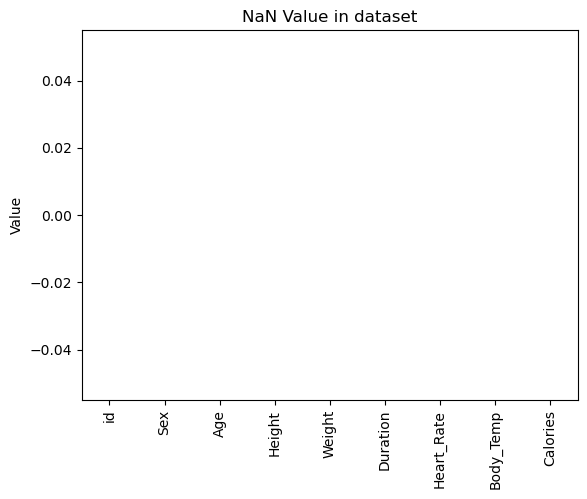

In [3]:
df.info()
null_value = df.isnull().sum()
null_value.plot(kind='bar', title='NaN Value in dataset', ylabel='Value')
plt.show()

In [29]:
df = df.drop_duplicates().reset_index(drop=True)

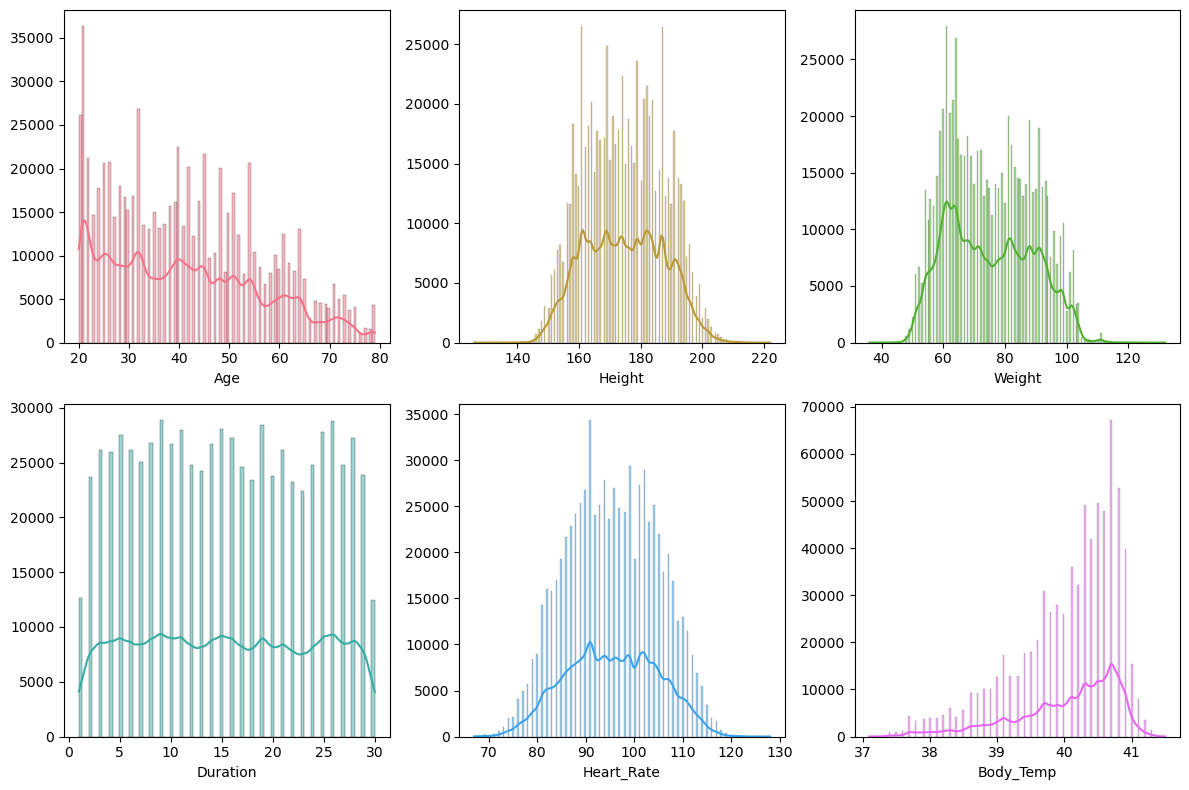

In [5]:
#univariate distribution of the features.
col = ["Age", "Height", "Weight", "Duration", "Heart_Rate", "Body_Temp"]
colors = sb.color_palette("husl", len(col))

fig, axes = plt.subplots(2, 3, figsize=(12, 8))  
axes = axes.flatten()


for i in range(len(col)):
    sb.histplot(df[col[i]], kde=True, ax=axes[i], color=colors[i])
    axes[i].set_ylabel("")


# sb.countplot(x='Sex', data=df, ax=axes[len(col)])
# axes[len(col)].set_ylabel("")


# for j in range(len(col) + 1, len(axes)):
#     fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [38]:
df["Sex"] = (df["Sex"] == "female").astype(bool)
df.drop(['id'], axis=1, inplace=True) 
y = np.log1p(df["Calories"])
df.drop("Calories", axis=1, inplace=True)
X = df

In [31]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [32]:
y_pred_val = model.predict(X_val)
rmsle = np.sqrt(mean_squared_log_error(np.expm1(y_val), np.expm1(y_pred_val)))
print("Validation RMSLE:", rmsle)

Validation RMSLE: 0.061179564764417854


In [39]:
df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)
df['BMR'] = 10 * df['Weight'] + 6.25 * df['Height'] -  5 * df['Age'] + np.where(df['Sex'] == False, 5, -161)
df['IH'] = df['Heart_Rate'] / df['Duration']

In [40]:
X = df 

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = CatBoostRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

0:	learn: 0.8749909	total: 89.3ms	remaining: 17.8s
1:	learn: 0.7958194	total: 121ms	remaining: 11.9s
2:	learn: 0.7240361	total: 151ms	remaining: 9.89s
3:	learn: 0.6588670	total: 178ms	remaining: 8.71s
4:	learn: 0.6011702	total: 221ms	remaining: 8.62s
5:	learn: 0.5490796	total: 251ms	remaining: 8.12s
6:	learn: 0.5015562	total: 286ms	remaining: 7.89s
7:	learn: 0.4584686	total: 330ms	remaining: 7.91s
8:	learn: 0.4201867	total: 371ms	remaining: 7.88s
9:	learn: 0.3853697	total: 409ms	remaining: 7.77s
10:	learn: 0.3540493	total: 435ms	remaining: 7.47s
11:	learn: 0.3255676	total: 465ms	remaining: 7.28s
12:	learn: 0.3005433	total: 496ms	remaining: 7.13s
13:	learn: 0.2779001	total: 522ms	remaining: 6.93s
14:	learn: 0.2574771	total: 565ms	remaining: 6.97s
15:	learn: 0.2390084	total: 600ms	remaining: 6.89s
16:	learn: 0.2221315	total: 630ms	remaining: 6.78s
17:	learn: 0.2066377	total: 670ms	remaining: 6.78s
18:	learn: 0.1931755	total: 700ms	remaining: 6.67s
19:	learn: 0.1810613	total: 725ms	remain

In [44]:
y_pred_val = model.predict(X_val)
rmsle = np.sqrt(mean_squared_log_error(np.expm1(y_val), np.expm1(y_pred_val)))
print("Validation RMSLE:", rmsle)

Validation RMSLE: 0.06097747241481598


In [45]:
test = pd.read_csv('test.csv')

In [46]:
test["Sex"] = (test["Sex"] == "female").astype(bool)
test['BMI'] = test['Weight'] / ((test['Height'] / 100) ** 2)
test['BMR'] = 10 * test['Weight'] + 6.25 * test['Height'] -  5 * test['Age'] + np.where(test['Sex'] == False, 5, -161)
test['IH'] = test['Heart_Rate'] / test['Duration']

In [47]:
y_test_log = model.predict(test.drop(columns=['id']))
y_test_pred = np.expm1(y_test_log)

In [48]:
submission = pd.DataFrame({'id': test['id'], 'Calories': y_test_pred})
submission.to_csv('submission.csv', index=False)